# The DataStats Plotting Module

This modules contains functions that are useful in exploratory data analysis plotting and also some functions for plot styling and annotation.  

Usage for some of these functions will be demonstrated in this notebook.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import datastats.plotting as dsplt
from datastats.multivar import ResampleInterSlope

## SetParams

I use this function to set some basic parameters for style and fonts for all my plots. Font is used to choose the font family. Basesize sets a minimum font size that is used for the smallest text such as tick labels and other text that needs to be larger such as axis labels (+1) and titles (+2) are set based on this value. Basecolor is the color to use for plot components. Style is the overall style to use for plots.

In [2]:
dsplt.SetParams(font='DejaVu Sans Mono', basesize=12, basecolor='0.4', style='seaborn-white')

For these examples I will use the seaborn 'mpg' (cars) data set.

In [3]:
df=sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## LinRegPlot

This function generates a seaborn-like linear regression plot that includes a scatter plot of the data, a best fit line, and a confidence interval. The difference between this plot and the seaborn version is that the confidence interval is produced by non-parametric computational methods.

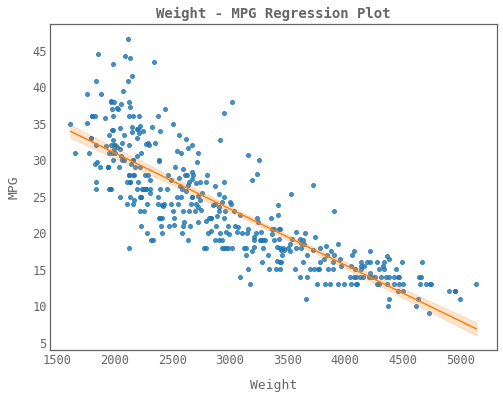

In [4]:
dsplt.LinRegPlot(df.weight, df.mpg, ci=95,
                 x_label='Weight', y_label='MPG', 
                 plot_title='Weight - MPG Regression Plot')

plt.show()

## LinRegPlusResidualPlot

This function generates a LinRegPlot (see above) and also a residual percentile plot that helps with understanding how the residuals are distributed around the best fit line.

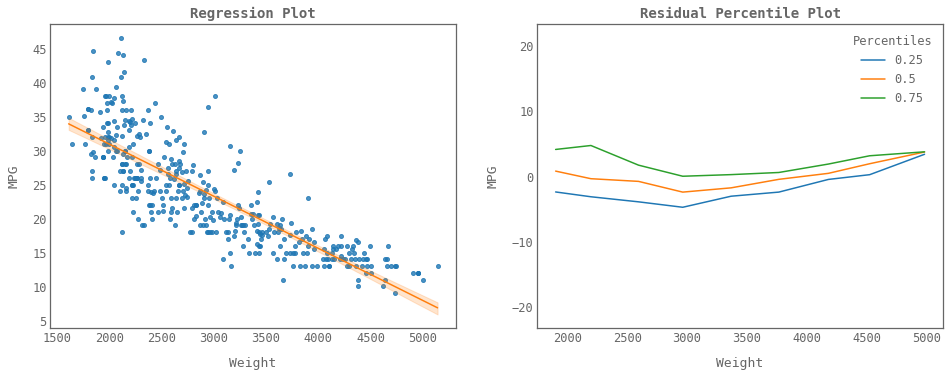

In [5]:
fig, axes = dsplt.LinRegPlusResidualPlot(df.weight, df.mpg, x_label='Weight', y_label='MPG')

plt.show()

The three lines in the Residual Percentile Plot show what the residuals look like at three percentiles (.25,.50,.75). This helps us visualize how the residuals are distriubuted around the best fit line. The difference between the top and bottom lines indicates the IQR, which gives us a sense of how accurate we could expect to be in using our linear model to make inferences.  

There will always be some up and down fluctuation in the lines plotted on the residual percentile plot, however the lines should parallel each other and be generally horizontally straight when the best fit line is a good fit with the data. The books ThinkStats, where I learned about these plots, describes how to interpret them as follows:
"Ideally these lines should be flat, indicating that the residuals are random, and parallel, indicating that the variance of the residuals is the same for all [bins]."

In this particular example, we can pick out a couple of interesting features. At low weights, it's clear that the residuals are more widely distributed around the fit line, and it can be seen how the group of high MPG data points pulls the 0.75 percentile line away from being parallel with the others. As we move right to higher weights, the lines are closer together because the residuals are more tightly distributed around the best fit line. The lines are also upward sloping here because the data points go from being concentrated below the best fit line to above it. This tells us that the relationship is not perfectly linear but it's probably a good enough model for many uses.

In this way the Residual Percentile Plot provides a bit of extra helpful visual information for analyzing best fit lines.

## CdfPlot

This function plots the cdf for supplied data. It's especially useful for looking at sampling distributions.  

In this example I'll first generate a sampling distribution for the slope of the MPG-weight best fit line through resampling, using ResampleInterSlope from the multivar module (imported above).  

Then I'll plot the CDF of this slope sampling distribution and show how we can also add a test stat line using an example test stat of -0.0083.

In [6]:
inters, slopes, fit_ys_list = ResampleInterSlope(df.weight, df.mpg)

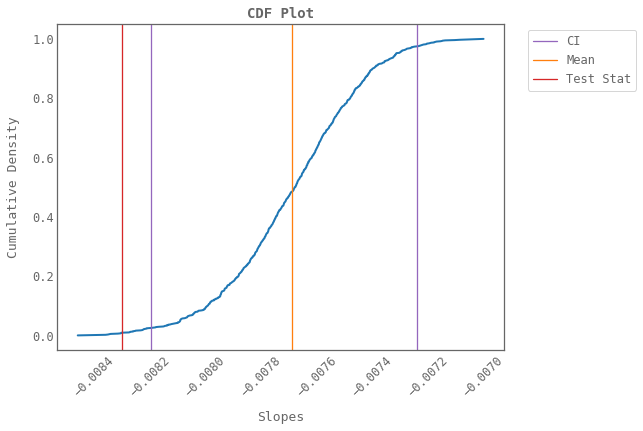

In [7]:
fig, ax = dsplt.CdfPlot(slopes, ci=95, x_label='Slopes', test_stat=-0.0083)
ax.legend(frameon=True, bbox_to_anchor=(1.04,1), loc="upper left")

plt.xticks(rotation=45)

plt.show()

## KdePlot

In a similar manner to CdfPlot, this function produces a KDE plot for supplied data. Seaborn kdeplot is used to plot the data.

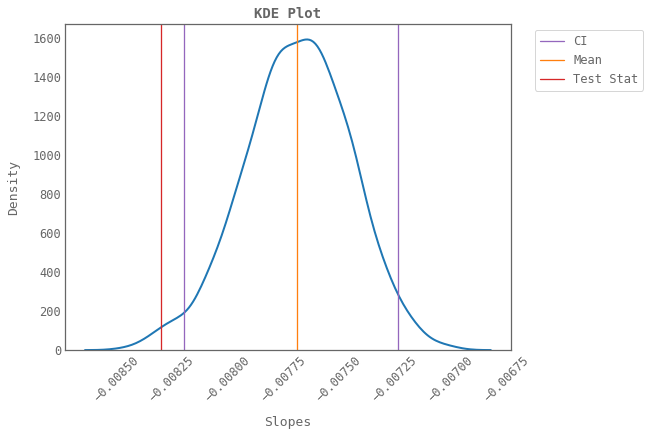

In [8]:
fig, ax = dsplt.KdePlot(slopes, ci=95, x_label='Slopes', test_stat=-0.0083)
ax.legend(frameon=True, bbox_to_anchor=(1.04,1), loc="upper left")

plt.xticks(rotation=45)

plt.show()

## NormProbPlot

This function produces a normal probability plot for supplied data, which can be used to visualize how closely the data fits a normal distribution.

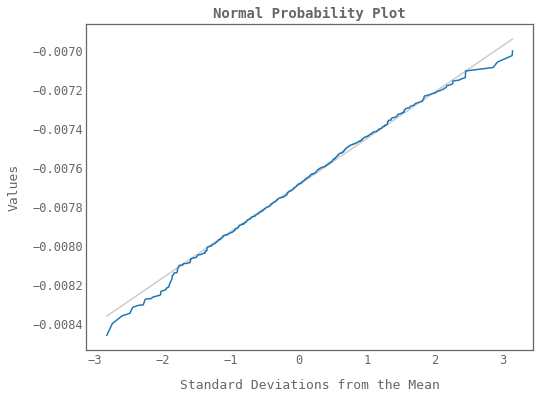

In [9]:
dsplt.NormProbPlot(slopes)

plt.show()

## AllNumVarDensityPlot

This function generates a density plot for each numerical variable in a DataFrame. The kind can be selected as either CDF or KDE.

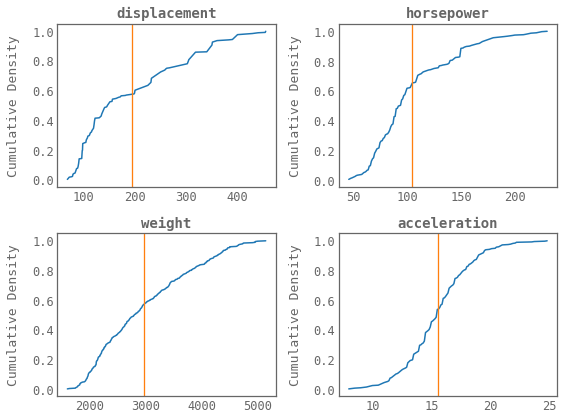

In [10]:
# Make a list of all numerical variables in the DataFrame
numerical_vars = ['displacement', 'horsepower', 'weight', 'acceleration']

# Plot the densities of all numerical variables
fig,axes = dsplt.AllNumVarDensityPlot(numerical_vars, data=df, kind='cdf', central_tendency_measure='mean')

For the next few examples we will use the tips dataset.

In [11]:
tips_df=sns.load_dataset("tips")

# Add tip rate column
tips_df['tip_rate'] = tips_df.tip/tips_df.total_bill*100

tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


## AllCatVarCountPlot
This function generates a count plot for each categorical variable in a DataFrame.

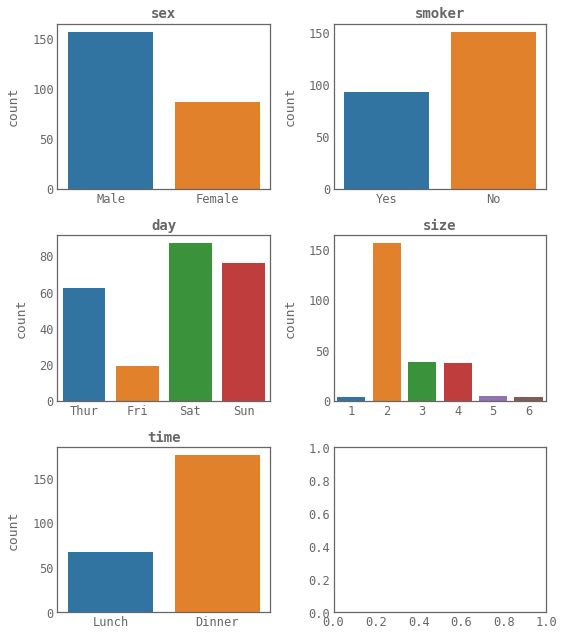

In [12]:
# Make a list of all categorical variables in the DataFrame
categorical_vars = ['sex', 'smoker', 'day', 'size', 'time']

# Plot the densities of all categorical variables
fig,axes = dsplt.AllCatVarCountPlot(categorical_vars, tips_df)

## TwoCatProportionPlot
This function computes and plots the proportions (percentages) of one categorical variable within another.

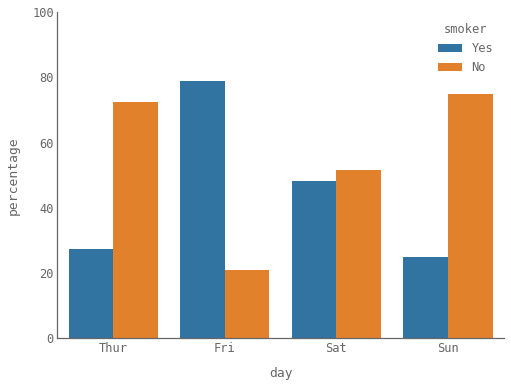

In [13]:
fig,ax = dsplt.TwoCatProportionPlot(x='day', hue='smoker', data=tips_df)

dsplt.Despine(ax=ax)

## AnnotateBars

This function adds a text label to each bar in a bar plot corresponding to the value of the bar.  

To demonstrate how some of the optional parameters work, I'll make it a horizontallly oriented plot and move the annotations inside the bars.  

I'll also make use of the custom Despine function in DataStats Plotting.

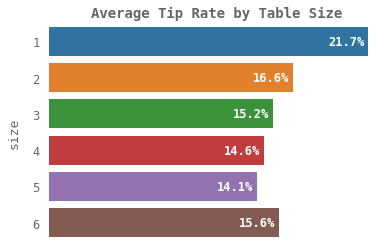

In [14]:
# Horizontal bar plot
g=sns.barplot(x='tip_rate', y='size', data=tips_df, orient='h', ci=None)

# Set bar annotations
dsplt.AnnotateBars(g.patches, orient='h', offset=-40, color='white', weight='bold', decimal_digits=1, percent=True)

# Despine the plot
dsplt.Despine(ax=g, spines='all', remove_x_ticks=True, remove_x_label=True)

# Give the plot a title and add a bit of padding between y-tick values and the plot
g.set_title('Average Tip Rate by Table Size')
g.yaxis.set_tick_params(pad=10)
           
plt.show()

## AnnotateLineYs

This function adds y coordinate annotations to all the points on a line, and automatically adjusts annotation placement based on angles of incoming and outgoing lines of the points.

In [15]:
# Create some sales data
sales_data = {'Jan':2.5, 'Feb':2.3, 'Mar': 2.6, 'Apr':2.9, 'May':3.5, 'Jun':3.8,
              'Jul':4.8, 'Aug':4.5, 'Sep':3.7, 'Oct':2.4, 'Nov':2.1, 'Dec': 3.5}

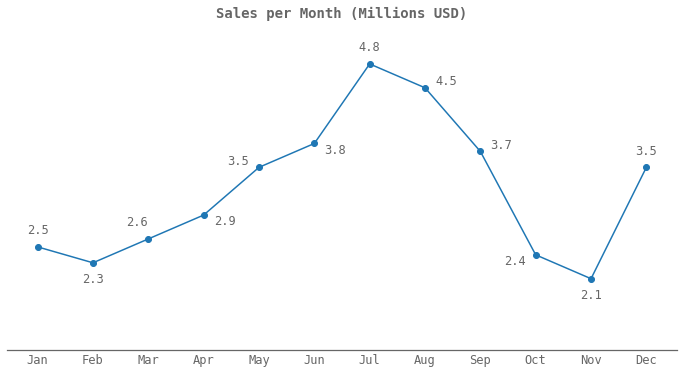

In [16]:
# Set up figure (single plot)
fig,ax = plt.subplots()
fig.set_size_inches(12,6)

# Plot the sales data values
ax.plot(sales_data.values(), marker='o')

# Set x axis labels
ax.set_xticks(range(0,12))
ax.set_xticklabels(sales_data.keys())

# Set y axis limits
ax.set_ylim(1.2,5.3)

# Add a title
ax.set_title("Sales per Month (Millions USD)")

# Add point annotations
dsplt.AnnotateLineYs(range(0,12), sales_data.values())

# Remove spines
dsplt.Despine(ax=ax, spines='toprightleft', remove_y_ticks=True, remove_y_label=True)